In [15]:
# 2) Web scraping z wordcount - pobrać wiele stron internetowych i przeanalizować za pomocą wordcount/wordcloud, zapisać wyniki w CSV/NoSQL, możliwa wizualizacja


In [11]:
import requests

x = requests.get("http://x-kom.pl")       #2
k = requests.get("http://komputronik.pl") #3
m = requests.get("http://morele.net")     #4
n = requests.get("http://nvidia.com")     #5

wiki = requests.get("http://pl.wikipedia.org/wiki/Wikipedia:Strona_główna")

In [53]:
                                                # z logowaniem sie
s = requests.session()    #1
payload = {               # (zalogować się) -> PPM -> Zbadaj element -> Network -> login?login=ok
                          #payload to dane logowania, na dole jest login?login=ok -> Form Data
    'usernames':'arekadiusz',
    'passwords':"projekt123",
}
response = s.post("https://www.ytmonster.net/login?login=ok",data=payload)
print(response.status_code)   #wyświetlanie HTTP code (1-info, 2-success,3-redirect,4-client error, 5-server error)


s1 = requests.session()   #2
payload = {               
    'usernames':'arek123',
    'passwords':"arekprojekt123",
}
response = s.post("https://www.i-apteka.pl/signin.php",data=payload)
print(response.status_code)


200
200


In [13]:
import urllib.request

# https://ocular.pepper.pl/pixel.gif?event=cookies_settings&context=cookies_message&action=accept_all&ab=&country=pl
    
pepper = "http://wp.pl"           #INNE STRONY NIE DZIAŁAJĄ, BO ALGORYTMY (mod_security) AUTOMATYCZNIE BLOKUJĄ ALGORYTMY
                                # ( https://stackoverflow.com/questions/16627227/problem-http-error-403-in-python-3-web-scraping )

responsewp = urllib.request.urlopen(pepper)
print(responsewp.read()[:200])

b'\n    <!DOCTYPE html>\n      <html lang="pl">\n        <head>\n          \n          <script src="https://www.wp.pl/Z3N5bTF6dVIvVxRnaU14bGwPQAsZaQVsEWo9CxlpBWwRaj0LGWkFbBFqPQsZaQVsEWo9CxlpBWwRaj0LGWkFbBFqP'


In [14]:
#Proxy Pepper.pl
import urllib.request

class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

openerpepper = AppURLopener("https://eu4.proxysite.com/process.php?d=IZhWUg9WMB5%2BcAN3i6RjTc0U&b=1")
responsepepper = opener.open('http://httpbin.org/user-agent')

<ipython-input-14-fc2d8474fe7d>:7: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  openerpepper = AppURLopener("https://eu4.proxysite.com/process.php?d=IZhWUg9WMB5%2BcAN3i6RjTc0U&b=1")


AssertionError: proxies must be a mapping

In [15]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from PIL import Image  
import PIL  

imie = 'Arkadiusz'
rimie = Request('https://www.google.pl/search?&dcr=0&tbm=isch&q='+imie, headers={'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Mobile Safari/537.36'})
response = urlopen(rimie).read()
len(response)
picture = Image.open("zaliczenieGoogle.jpg")  
picture = picture.save("zaliczenieGoogle.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'zaliczenieGoogle.jpg'

In [16]:
# pip install google_images_download

In [55]:
#   NIE DZIAŁA, BO GOOGLE COŚ POZMIENIAŁO
#   https://github.com/hardikvasa/google-images-download/issues/301
#   https://github.com/hardikvasa/google-images-download/blob/fbc4a16a7561d3373f9d6bac750cbb3aff90b51f/google_images_download/google_images_download.py

# importing google_images_download module
from google_images_download import google_images_download 
  
# creating object
responsegoogle = google_images_download.googleimagesdownload() 

search_queries = [   
'Arkadiusz Wawrzyniak',
'Jacek Maslankowski',
'Iniwersytet gdanfdsfski',
]

def downloadimages(query):
    # keywords is the search query
    # format is the image file format
    # limit is the number of images to be downloaded
    # print urs is to print the image file url
    # size is the image size which can
    # be specified manually ("large, medium, icon")
    # aspect ratio denotes the height width ratio
    # of images to download. ("tall, square, wide, panoramic")
    arguments = {"keywords": query,
                 "format": "jpg",
                 "limit":4,
                 "print_urls":True,
                 "size": "medium",
                 "aspect_ratio":"panoramic"}
    try:
        responsegoogle.download(arguments)
      
    # Handling File NotFound Error    
    except FileNotFoundError: 
        arguments = {"keywords": query,
                     "format": "jpg",
                     "limit":4,
                     "print_urls":True, 
                     "size": "medium"}
                       
        # Providing arguments for the searched query
        try:
            # Downloading the photos based
            # on the given arguments
            responsegoogle.download(arguments) 
        except:
            pass
  
for query in search_queries:
    downloadimages(query) 
    print() 


Item no.: 1 --> Item name = Arkadiusz Wawrzyniak
Evaluating...
Starting Download...


Unfortunately all 4 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



Item no.: 1 --> Item name = Jacek Maslankowski
Evaluating...
Starting Download...


Unfortunately all 4 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0



Item no.: 1 --> Item name = Iniwersytet gdanfdsfski
Evaluating...
Starting Download...


Unfortunately all 4 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0




In [18]:
candidate_proxies = ['"http://ocular.pepper.pl/pixel.gif?event=cookies_settings&context=cookies_message&action=accept_all&ab=&country=pl',
                     'http://proxy2.example.com:1234',
                     'http://proxy3.example.com:1234']
for proxy in candidate_proxies:
    print("Trying HTTP proxy %s" % proxy)
    try:
        result = urllib.urlopen("http://www.google.com", proxies={'http': proxy})
        print("Got URL using proxy %s" % proxy)
        break
    except:
        print("Trying next proxy in 5 seconds")
        time.sleep(5)

Trying HTTP proxy "http://ocular.pepper.pl/pixel.gif?event=cookies_settings&context=cookies_message&action=accept_all&ab=&country=pl
Trying next proxy in 5 seconds


NameError: name 'time' is not defined

In [19]:
cookies = {'cookies_settings': '_ga=GA1.2.604824171.1623146297; _gid=GA1.2.2127064460.1623146297; _gat=1'}

r1 = requests.post('http://pepper.pl', cookies=cookies)
r1 =requests.get('http://pepper.pl')

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')    #html parser służy do wykrywania znaczników

import re

def visible(r1):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

#wyciągane i wrzucane do listy
page_text_list11 = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list11.append(t)

#łączenie listy
page_text11 = "".join(page_text_list11)
page_text11[:80]    #wyświetlanie pierwszych 80 znaków

#split() = split (" ")
page_words11 = page_text.spli11t()
print(len(page_words11), page_words11[:10])

AttributeError: 'bytes' object has no attribute 'text'

In [21]:
#conda install numpy

In [22]:
from urllib.request import urlopen
html = urlopen("http://www.google.com/").read()
#print(html)

In [23]:
# INNY KOD: https://docs.python-requests.org/en/master/_modules/requests/cookies/

import requests
import http.cookiejar
from urllib.request import build_opener, HTTPCookieProcessor, HTTPHandler

#Create a CookieJar object to hold the cookies
cookielib = http.cookiejar
cj = cookielib.CookieJar()

#Create an opener to open pages using the http protocol and to process cookies.
opener = build_opener(HTTPCookieProcessor(cj), HTTPHandler())

#create a request object to be used to get the page.
req = requests.get("http://komputronik.pl")
f = open("plik123.txt","w")

#see the first few lines of the page
# html = f.read()
#print(req[:50])

#Check out the cookies
print("Ciasteczka: ")
for cookie in cj:
    print(cookie)

Ciasteczka: 


In [24]:
import urllib.request
import http.cookiejar

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

url = "http://komputronik.pl"
headers={'User-Agent':user_agent,} 

request=urllib.request.Request(url,None,headers) #Złożony request
response = urllib.request.urlopen(request)
data = response.read()
print(data)


b'<!doctype html>\n<html lang="pl">\n<head>\n    <meta charset="utf-8"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0"/>\n    <meta name="format-detection" content="telephone=no"/>\n    <meta http-equiv="x-rim-auto-match" content="none"/>\n    <meta name="facebook-domain-verification" content="oa18gsotx2fhvl9q7yzyidytgsyao5" />\n\n    \n<link rel="preload" href="https://front.komputronik.pl/pl-komputronik/fonts/komputronik-icons-set-v30.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n<link rel="preload" href="https://front.komputronik.pl/pl-komputronik/fonts/open-sans/OpenSans-Regular.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n<link rel="preload" href="https://front.komputronik.pl/pl-komputronik/fonts/open-sans/OpenSans-SemiBold.woff2" as="font" type="font/woff2" crossorigin="anonymous">\n<link rel="preload" href="https://front.komputronik.pl/pl-komputronik/fonts/open

In [25]:
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

#wyciągane i wrzucane do listy
page_text_list_kom = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list_kom.append(t)

#łączenie listy
page_text_kom = "".join(page_text_list)
page_text_kom[:80]    #wyświetlanie pierwszych 80 znaków

#split() = split (" ")
page_words_kom = page_text_kom.split()
print(len(page_words_kom), page_words_kom[:10])

NameError: name 'soup' is not defined

In [26]:
import urllib.request
import http.cookiejar

jar = cookielib.FileCookieJar("cookies")

print("Aktualnie jest %d ciasteczek" % len(jar))
print("Pobieranie strony")
print("")

urllib.request.urlopen("http://onet.pl")
print(response.headers)

print("")
print("Pobrano stronę")
print("Aktualnie jest %d ciasteczek" % len(jar))

Aktualnie jest 0 ciasteczek
Pobieranie strony

Date: Fri, 11 Jun 2021 13:03:22 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
set-cookie: KTRSESSION=08279cc84648b90f3e80ea3f4dc561a8; expires=Fri, 18-Jun-2021 13:03:22 GMT; Max-Age=604800; path=/
cache-control: no-store
referrer-policy: no-referrer-when-downgrade
x-content-type-options: nosniff
x-xss-protection: 1; mode=block
vary: Accept-Encoding
strict-transport-security: max-age=16000000; includeSubDomains; preload;
x-ha: t154
x-frame-options: sameorigin
CF-Cache-Status: DYNAMIC
cf-request-id: 0a9cc496b5000000e839393000000001
Expect-CT: max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"
Server: cloudflare
CF-RAY: 65db0a045f4500e8-AMS
alt-svc: h3-27=":443"; ma=86400, h3-28=":443"; ma=86400, h3-29=":443"; ma=86400, h3=":443"; ma=86400



Pobrano stronę
Aktualnie jest 0 ciasteczek


In [27]:
# print(k.cookies)

In [28]:
n.text[:100]

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7]><html class="html-page no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<'

In [29]:
x.text[:100]

'<!DOCTYPE html>\n<html lang="pl">\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Comp'

In [30]:
k.text[:100]

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if I'

In [31]:
m.text[:100]

'<!DOCTYPE html>\n<html lang="pl-PL">\n<head>\n<meta charset="utf-8">\n<meta name="viewport" content="wid'

In [32]:
wiki.text[:100]

'<!DOCTYPE html>\n<html class="client-nojs" lang="pl" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title'

In [41]:
#2. Wordcount WIKIPEDIA
from bs4 import BeautifulSoup
soup = BeautifulSoup(wiki.text, 'html.parser')    #html parser służy do wykrywania znaczników

import re

def visible(element):
    if element.parent.name in ['class', 'script', '[document]', 'head', 'lang', 'dir','Wikipedia']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

#wyciągane i wrzucane do listy
page_text_list_wiki = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list_wiki.append(t)

#łączenie listy
page_text_wiki = "".join(page_text_list_wiki)
page_text_wiki[:80]    #wyświetlanie pierwszych 80 znaków

#split() = split (" ")
page_words_wiki = page_text_wiki.split()
print(len(page_words_wiki), page_words_wiki[:10])

1101 ['Wikipedia,', 'wolna', 'encyklopedia', 'CentralNotice', 'Wikipedia:Strona', 'główna', 'Z', 'Wikipedii,', 'wolnej', 'encyklopedii']


In [42]:
import urllib.request
import http.cookiejar

url1 = 'http://komputronik.pl'
cookies = dict(cookies_are='working')

r1 = requests.get(url1, cookies=cookies)
r1.text[:1000]


'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n\n<title>Please Wait... | Cloudflare</title>\n  \n<meta name="captcha-bypass" id="captcha-bypass" />\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-

In [51]:
import urllib.request
import http.cookiejar


from bs4 import BeautifulSoup
soup2 = BeautifulSoup(r1.text, 'html.parser')

url1 = 'http://komputronik.pl'
cookies = dict(cookies_are='KTRSESSION')

r1 = requests.get(url1, cookies=cookies)

import re
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

#wyciągane i wrzucane do listy
page_text_list2 = []
for t in filter(visible, soup2.findAll(text=True)):
    page_text_list2.append(t)

#łączenie listy
page_text2 = "".join(page_text_list2)
page_text2[:80]    #wyświetlanie pierwszych 80 znaków

#split() = split (" ")
page_words2 = page_text2.split()
print(len(page_words2), page_words2[:10])

746 ['Włącz', 'tryb', 'ciemny', '-', 'oszczędzaj', 'energię', 'i', 'wzrok.', 'Jak', 'to']


In [50]:
import string
page_words2 = [w.strip(string.punctuation).lower() for w in page_words2 if
len(w.strip(string.punctuation))>0]
print(len(page_words2), page_words2[:10])

142 ['endif', 'please', 'enable', 'cookies', 'please', 'wait', 'we', 'are', 'checking', 'your']


In [37]:
# DZIAŁA:

In [38]:
# pip install wordcloud

In [48]:
from collections import Counter
page_word_freq = Counter(page_words2).most_common()
print(len(page_word_freq), page_word_freq[:10])

85 [('the', 7), ('you', 6), ('please', 5), ('are', 5), ('to', 5), ('your', 4), ('a', 4), ('on', 3), ('and', 3), ('can', 3)]


Populating the interactive namespace from numpy and matplotlib


W:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

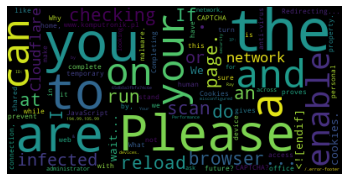

In [40]:
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")

In [97]:
from collections import Counter
page_word_freq2 = Counter(page_words2).most_common()
print(len(page_word_freq2), page_word_freq2[:10])

115 [('Credits', 11), ('to', 5), ('your', 5), ('Campaigns', 5), ('and', 5), ('Earn', 4), ('our', 4), ('Learn', 4), ('5', 4), ('min.', 4)]


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

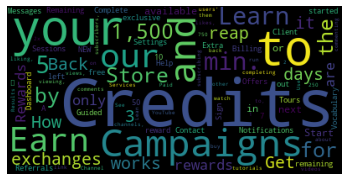

In [207]:
# https://www.ytmonster.net

%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq2 = {}
for i in page_word_freq2:
    dict_page_word_freq2[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq2)
plt.imshow(wordcloud)
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

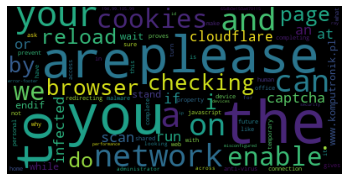

In [52]:
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")

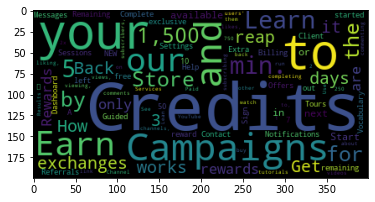

In [208]:
#4. Usuń tzw. stop words i wygeneruj ponownie chmurę słów kluczowych.
ENGLISH_STOP_WORDS=['to', 'for', 'and', 'how', 'few', 'on', 'no', 'or', 'in', 'our', 'the', 'out']

#czy nie są STOP_WORDS i czy nie ma cyfr
word_freq_no_stop = [w for w in page_word_freq if w[0] not in ENGLISH_STOP_WORDS and not w[0].isdigit()]
dict_word_freq_no_stop = {}       #zrzucenie do słownika
for i in word_freq_no_stop:
    dict_word_freq_no_stop[i[0]]=i[1]
plt.imshow(wordcloud)

wordcloud = WordCloud(max_words=100,background_color="white").fit_words(dict_word_freq_no_stop)

#zapisanie pliku do png
plt.savefig("zal1.png",dpi=300)

In [27]:
#5. Zapisz słowa kluczowe w postaci pliku CSV.
plik=open("zal1.csv","w",encoding="utf8")    #stworzenie nowego pliku
plik.write("word;count\n")
for i in word_freq_no_stop:
    plik.write(str(i[0]).replace("\n","").replace(";","")+";"+str(i[1])+"\n")     #zapisanie
plik.close();

In [28]:
#6. Wczytaj pliki i przeprowadź jego analizę wykorzystując parametry grupowania oraz licząc średnią liczbę słów.
import pandas as pd
df=pd.read_csv("zal1.csv",encoding="utf8",delimiter=";")
df.head()

,word,count
0,credits,11
1,your,5
2,campaigns,5
3,earn,4
4,rewards,4


In [29]:
df.describe()

,count
count,89.000000
mean,1.595506
std,1.387600
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


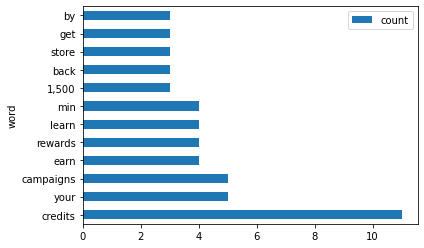

In [31]:
df[(df['count']>2)].plot(kind='barh',x='word',y='count')
plt.savefig('zal1_1.png',dpi=360)

Blad


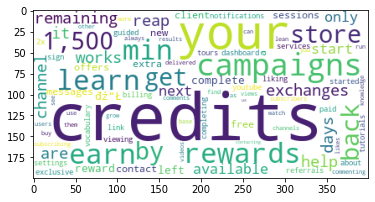

In [232]:
#7. Wygeneruj chmurę słów kluczowych.
plik=open('zal1.csv')
zawartosc=str(plik.read())
wiersze=zawartosc.split('\n')
dict_word_freq_no_stop = {}       #zrzucenie do słownika

for i in wiersze[1:]:
    try:
        dict_word_freq_no_stop[i.split(";")[0]]=int(i.split(";")[1])
    except:
        print("Blad")
plt.imshow(wordcloud)

wordcloud = WordCloud(max_words=100,background_color="white").fit_words(dict_word_freq_no_stop)



Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

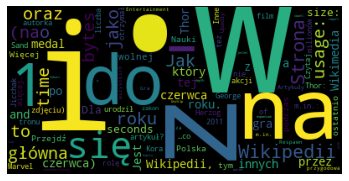

In [227]:
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

dict_page_word_freq_wiki = {}
for i in page_word_freq_wiki:
    dict_page_word_freq_wiki[i[0]]=i[1]
wordcloudwiki = WordCloud(max_words=100).fit_words(dict_page_word_freq_wiki)
plt.imshow(wordcloudwiki)
plt.axis("off")

In [196]:
from collections import Counter
page_word_freq_wiki = Counter(page_words_wiki).most_common()
print(len(page_word_freq_wiki), page_word_freq_wiki[:10])

898 [('w', 25), ('i', 21), ('•', 21), ('z', 17), ('na', 16), ('do', 12), ('–', 9), ('1', 9), ('się', 8), ('Wikipedii', 5)]


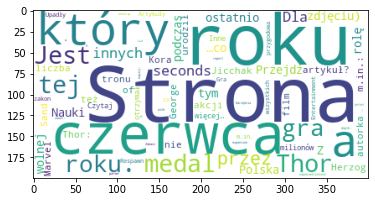

In [275]:
#4. Usuń tzw. stop words i wygeneruj ponownie chmurę słów kluczowych.
POLISH_STOP_WORDS=['w', 'a','i', 'z', 'na', 'do', '-', '1', 'wraz', 'od', 'oraz', 'lub','na','to','bytes','size','size:','usage','(',')',
                   '.','Jak','-','się','and','o','po','•','–','strona','główna','Wikipedii','Wikimedia','Więcej','time', 'usage:','(na','Wikipedii,',
                  'jako','czerwca)']

#czy nie są STOP_WORDS i czy nie ma cyfr
word_freq_no_stop_wiki = [w for w in page_word_freq_wiki if w[0] not in POLISH_STOP_WORDS and not w[0].isdigit()]
dict_word_freq_no_stop_wiki = {}       #zrzucenie do słownika
for i in word_freq_no_stop_wiki:
    dict_word_freq_no_stop_wiki[i[0]]=i[1]
plt.imshow(wordcloudwiki)

wordcloudwiki = WordCloud(max_words=100,background_color="white").fit_words(dict_word_freq_no_stop_wiki)

#zapisanie pliku do png
plt.savefig("zal_wiki.png",dpi=300)

In [276]:
#5. Zapisz słowa kluczowe w postaci pliku CSV.
plik=open("zal_wiki.csv","w",encoding="utf8")    #stworzenie nowego pliku
plik.write("word;count\n")
for i in word_freq_no_stop_wiki:
    plik.write(str(i[0]).replace("\n","").replace(";","")+";"+str(i[1])+"\n")     #zapisanie
plik.close();

In [277]:
#6. Wczytaj pliki i przeprowadź jego analizę wykorzystując parametry grupowania oraz licząc średnią liczbę słów.
import pandas as pd
df=pd.read_csv("zal_wiki.csv",encoding="utf8",delimiter=";")
df.head()

,word,count
0,Strona,5
1,roku,4
2,czerwca,3
3,który,3
4,medal,3


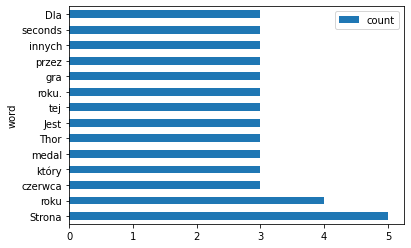

In [278]:
df[(df['count']>2)].plot(kind='barh',x='word',y='count')
plt.savefig('zal_wiki.png',dpi=360)

Blad


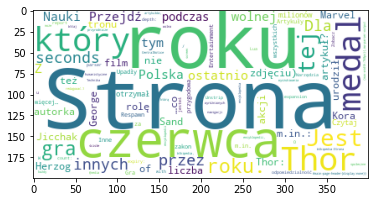

In [279]:
#7. Wygeneruj chmurę słów kluczowych.
plikwiki=open('zal_wiki.csv', encoding="utf8")
zawartoscwiki=str(plikwiki.read())
wierszewiki=zawartoscwiki.split('\n')
dict_word_freq_no_stop_wiki = {}       #zrzucenie do słownika

for i in wierszewiki[1:]:
    try:
        dict_word_freq_no_stop_wiki[i.split(";")[0]]=int(i.split(";")[1])
    except:
        print("Blad")
plt.imshow(wordcloudwiki)

wordcloudwiki = WordCloud(max_words=100,background_color="white").fit_words(dict_word_freq_no_stop)

In [57]:
onet=requests.get("http://onet.pl")

In [58]:
onet.text[:100]

'<!DOCTYPE html>\n<html>\n    <head>\n        <meta charset="utf-8" />\n        <meta http-equiv="X-UA-Co'

In [59]:
from bs4 import BeautifulSoup
souponet = BeautifulSoup(onet.text, 'html.parser')    #html parser służy do wykrywania znaczników

import re
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True


page_text_list_onet = []
for t in filter(visible, souponet.findAll(text=True)):
    page_text_list_onet.append(t)

#łączenie listy
page_text_onet = "".join(page_text_list_onet)
page_text_onet[:80]    #wyświetlanie pierwszych 80 znaków
page_words_onet = page_text_onet.split()

In [302]:
import string

page_words_onet = [w.strip(string.punctuation).lower() for w in page_words_onet if
len(w.strip(string.punctuation))>0]
print(len(page_words_onet), page_words_onet[:10])

2994 ['if', 'lt', 'ie', '9', 'script', 'src="https://ocdn.eu/paas-static/template-engine/761c2299f84c68fd0c0f2cf89381abaf/build/polyfill_ie8.js', 'type="text/javascript"></script', 'script', 'src="https://ocdn.eu/onetmobilemainpage/mainpage_desktop/polyfill/arrayfilter_polyfill.js', 'type="text/javascript"></script']


In [303]:
#8. NAGŁÓWKI
r=requests.get("http://onet.pl")
metatagionet=BeautifulSoup(r.text,"html.parser") 
naglowkionet=metatagionet.findAll("span",attrs={'class':'title'})
plikonet=open("zalonet.csv",'w',encoding='utf8')
for naglowekonet in naglowkionet:
    plikonet.write(naglowek.text.strip().replace(";","")+" ")
    print(naglowekonet.text.strip())
plikonet.close()

"Bity bije". Ze skutkami przemocy będziemy się mierzyć latami
Ten romans to skaza na jego życiu. "Wydarzyło się zło. Tyle"
O krok od katastrofy MiG-29. Oto co faktycznie potrafi ta maszyna
Awantura na posiedzeniu komisji z udziałem Banasia. "Skandal"
Ich premiera tłumaczą na polski. "Nie wierzyłem w to, co słyszę"
Nowe informacje ws. śmierci prof. Łapińskiego i jego żony
Zamieszanie wokół "paszportu covidowego". Rozwiewamy wątpliwości
Lewandowski pobije dziś rekord Kazimierza Deyny
Tak zagramy z Islandią? Sousa wystawi galowy skład!
Dlaczego ta zmiana w kadrze nie miałaby sensu?
Będziemy płacić podatek katastralny? Senator Bury jest pewien
Z wnętrza buchnął straszny odór. Były kadrowicz jest na dnie
Synowie Kory nie poszli w jej muzyczne ślady. Czym się zajmują?
Słynny tenisista zachwycony Igą Świątek. Polka odpowiedziała
Para z Polski mieszka w jurcie. 70 tys. zł za podstawową wersję
"Nie stać cię to nie chodź". Restaurator ostro o "paragonach grozy"
Była w tragicznym stanie. Próbował

In [308]:
#9. CHMURA SŁÓW Z PLIKU
plikonet=open('zalonet.csv','r',encoding='utf8')
zawartosconet=str(plikonet.read())
slowaonet=zawartosconet.split()
page_word_freq_onet=Counter(page_words_onet).most_common()
print(page_word_freq_onet[:5])
dict_page_word_freq_onet={}
for i in page_word_freq_onet:
    dict_page_word_freq_onet[i[0]]=i[1]

[('na', 88), ('w', 73), ('z', 54), ('i', 52), ('się', 30)]


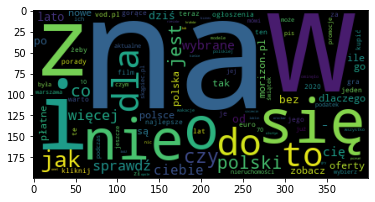

In [309]:
wordcloudonet=WordCloud(max_words=100).fit_words(dict_page_word_freq_onet)
plt.imshow(wordcloudonet)

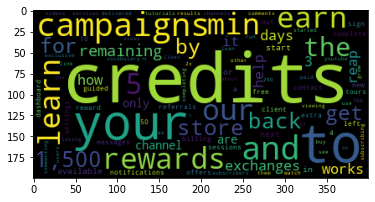

In [466]:
wordcloud=WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)

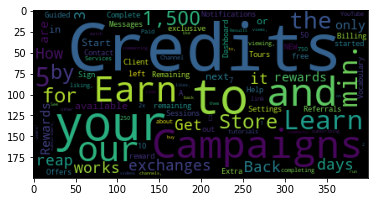

In [118]:
wordcloud=WordCloud(max_words=100).fit_words(dict_page_word_freq2)
plt.imshow(wordcloud)

In [467]:
#8. Pobierz z internetu wszystkie nagłówki artykułów prasowych (z dowolnego portalu) i zapisz w pliku csv.
rk=requests.get("http://komputronik.pl")
metatagikomputronik=BeautifulSoup(rk.text,"html.parser") 
naglowkikomputronik=metatagikomputronik.findAll("span",attrs={'class':'title'})
plikkomputronik=open("zalkomputronik.csv",'w',encoding='utf8')
for naglowekkomputronik in naglowkikomputronik:
    plikkomputronik.write(naglowekkomputronik.text.strip().replace(";","")+" ")
    print(naglowekkomputronik.text.strip())
plikkomputronik.close()

In [486]:
# from urllib.request import urlopen
# from bs4 import BeautifulSoup as soup
# import requests

header = {'user-agent':'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Mobile Safari/537.36','Referer':'https://www.amazon.com/s?k=python&ref=nb_sb_noss'}

url = 'https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/ref=sr_1_1'
html = requests.get(url,headers=header)

#Obiekt BeautifulSoup 
soupamazon = soup(html.content,'lxml')



In [487]:
#Autor książki
soupamazon.findAll('div',{'class':'a-row a-spacing-none a-size-base feature a-text-ellipsis'})[0].a.text


'Eric Matthes'

In [488]:
#Nazwa
soupamazon.h1.text.strip()


'Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming'

In [489]:
#Oceny
soupamazon.findAll('i',{'class':'a-icon a-icon-star-medium a-star-medium-4-5'})[0].text


'4.7 out of 5 stars'

In [502]:
#Cena
soupamazon.find('span',{'div':'a-size-medium a-color-price header-price a-text-normal'}[0])

KeyError: 0

In [491]:
#Ilość książek do kupienia
for a in soupamazon.findAll('span',{'class':'a-dropdown-container'})[0].findAll('option')[1:]:
  print(a.text.strip())

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [521]:
import copy
import time
import calendar

from ._internal_utils import to_native_string
from .compat import cookielib, urlparse, urlunparse, Morsel, MutableMapping

try:
    import threading
except ImportError:
    import dummy_threading as threading


class MockRequest(object):
    """Wraps a `requests.Request` to mimic a `urllib2.Request`.

    The code in `cookielib.CookieJar` expects this interface in order to correctly
    manage cookie policies, i.e., determine whether a cookie can be set, given the
    domains of the request and the cookie.

    The original request object is read-only. The client is responsible for collecting
    the new headers via `get_new_headers()` and interpreting them appropriately. You
    probably want `get_cookie_header`, defined below.
    """

    def __init__(self, request):
        self._r = request
        self._new_headers = {}
        self.type = urlparse(self._r.url).scheme

    def get_type(self):
        return self.type

    def get_host(self):
        return urlparse(self._r.url).netloc

    def get_origin_req_host(self):
        return self.get_host()

    def get_full_url(self):
        # Only return the response's URL if the user hadn't set the Host
        # header
        if not self._r.headers.get('Host'):
            return self._r.url
        # If they did set it, retrieve it and reconstruct the expected domain
        host = to_native_string(self._r.headers['Host'], encoding='utf-8')
        parsed = urlparse(self._r.url)
        # Reconstruct the URL as we expect it
        return urlunparse([
            parsed.scheme, host, parsed.path, parsed.params, parsed.query,
            parsed.fragment
        ])

    def is_unverifiable(self):
        return True

    def has_header(self, name):
        return name in self._r.headers or name in self._new_headers

    def get_header(self, name, default=None):
        return self._r.headers.get(name, self._new_headers.get(name, default))

    def add_header(self, key, val):
        """cookielib has no legitimate use for this method; add it back if you find one."""
        raise NotImplementedError("Cookie headers should be added with add_unredirected_header()")

    def add_unredirected_header(self, name, value):
        self._new_headers[name] = value

    def get_new_headers(self):
        return self._new_headers

    @property
    def unverifiable(self):
        return self.is_unverifiable()

    @property
    def origin_req_host(self):
        return self.get_origin_req_host()

    @property
    def host(self):
        return self.get_host()


class MockResponse(object):
    """Wraps a `httplib.HTTPMessage` to mimic a `urllib.addinfourl`.

    ...what? Basically, expose the parsed HTTP headers from the server response
    the way `cookielib` expects to see them.
    """

    def __init__(self, headers):
        """Make a MockResponse for `cookielib` to read.

        :param headers: a httplib.HTTPMessage or analogous carrying the headers
        """
        self._headers = headers

    def info(self):
        return self._headers

    def getheaders(self, name):
        self._headers.getheaders(name)


def extract_cookies_to_jar(jar, request, response):
    """Extract the cookies from the response into a CookieJar.

    :param jar: cookielib.CookieJar (not necessarily a RequestsCookieJar)
    :param request: our own requests.Request object
    :param response: urllib3.HTTPResponse object
    """
    if not (hasattr(response, '_original_response') and
            response._original_response):
        return
    # the _original_response field is the wrapped httplib.HTTPResponse object,
    req = MockRequest(request)
    # pull out the HTTPMessage with the headers and put it in the mock:
    res = MockResponse(response._original_response.msg)
    jar.extract_cookies(res, req)


def get_cookie_header(jar, request):
    """
    Produce an appropriate Cookie header string to be sent with `request`, or None.

    :rtype: str
    """
    r = MockRequest(request)
    jar.add_cookie_header(r)
    return r.get_new_headers().get('Cookie')


def remove_cookie_by_name(cookiejar, name, domain=None, path=None):
    """Unsets a cookie by name, by default over all domains and paths.

    Wraps CookieJar.clear(), is O(n).
    """
    clearables = []
    for cookie in cookiejar:
        if cookie.name != name:
            continue
        if domain is not None and domain != cookie.domain:
            continue
        if path is not None and path != cookie.path:
            continue
        clearables.append((cookie.domain, cookie.path, cookie.name))

    for domain, path, name in clearables:
        cookiejar.clear(domain, path, name)

class CookieConflictError(RuntimeError):
    """There are two cookies that meet the criteria specified in the cookie jar.
    Use .get and .set and include domain and path args in order to be more specific.
    """


class RequestsCookieJar(cookielib.CookieJar, MutableMapping):
    """Compatibility class; is a cookielib.CookieJar, but exposes a dict
    interface.

    This is the CookieJar we create by default for requests and sessions that
    don't specify one, since some clients may expect response.cookies and
    session.cookies to support dict operations.

    Requests does not use the dict interface internally; it's just for
    compatibility with external client code. All requests code should work
    out of the box with externally provided instances of ``CookieJar``, e.g.
    ``LWPCookieJar`` and ``FileCookieJar``.

    Unlike a regular CookieJar, this class is pickleable.

    .. warning:: dictionary operations that are normally O(1) may be O(n).
    """
    def get(self, name, default=None, domain=None, path=None):
        """Dict-like get() that also supports optional domain and path args in
        order to resolve naming collisions from using one cookie jar over
        multiple domains.

        .. warning:: operation is O(n), not O(1).
        """
        try:
            return self._find_no_duplicates(name, domain, path)
        except KeyError:
            return default

    def set(self, name, value, **kwargs):
        """Dict-like set() that also supports optional domain and path args in
        order to resolve naming collisions from using one cookie jar over
        multiple domains.
        """
        # support client code that unsets cookies by assignment of a None value:
        if value is None:
            remove_cookie_by_name(self, name, domain=kwargs.get('domain'), path=kwargs.get('path'))
            return

        if isinstance(value, Morsel):
            c = morsel_to_cookie(value)
        else:
            c = create_cookie(name, value, **kwargs)
        self.set_cookie(c)
        return c

    def iterkeys(self):
        """Dict-like iterkeys() that returns an iterator of names of cookies
        from the jar.

        .. seealso:: itervalues() and iteritems().
        """
        for cookie in iter(self):
            yield cookie.name

    def keys(self):
        """Dict-like keys() that returns a list of names of cookies from the
        jar.

        .. seealso:: values() and items().
        """
        return list(self.iterkeys())

    def itervalues(self):
        """Dict-like itervalues() that returns an iterator of values of cookies
        from the jar.

        .. seealso:: iterkeys() and iteritems().
        """
        for cookie in iter(self):
            yield cookie.value

    def values(self):
        """Dict-like values() that returns a list of values of cookies from the
        jar.

        .. seealso:: keys() and items().
        """
        return list(self.itervalues())

    def iteritems(self):
        """Dict-like iteritems() that returns an iterator of name-value tuples
        from the jar.

        .. seealso:: iterkeys() and itervalues().
        """
        for cookie in iter(self):
            yield cookie.name, cookie.value

    def items(self):
        """Dict-like items() that returns a list of name-value tuples from the
        jar. Allows client-code to call ``dict(RequestsCookieJar)`` and get a
        vanilla python dict of key value pairs.

        .. seealso:: keys() and values().
        """
        return list(self.iteritems())

    def list_domains(self):
        """Utility method to list all the domains in the jar."""
        domains = []
        for cookie in iter(self):
            if cookie.domain not in domains:
                domains.append(cookie.domain)
        return domains

    def list_paths(self):
        """Utility method to list all the paths in the jar."""
        paths = []
        for cookie in iter(self):
            if cookie.path not in paths:
                paths.append(cookie.path)
        return paths

    def multiple_domains(self):
        """Returns True if there are multiple domains in the jar.
        Returns False otherwise.

        :rtype: bool
        """
        domains = []
        for cookie in iter(self):
            if cookie.domain is not None and cookie.domain in domains:
                return True
            domains.append(cookie.domain)
        return False  # there is only one domain in jar


    def get_dict(self, domain=None, path=None):
        """Takes as an argument an optional domain and path and returns a plain
        old Python dict of name-value pairs of cookies that meet the
        requirements.

        :rtype: dict
        """
        dictionary = {}
        for cookie in iter(self):
            if (
                (domain is None or cookie.domain == domain) and
                (path is None or cookie.path == path)
            ):
                dictionary[cookie.name] = cookie.value
        return dictionary


    def __contains__(self, name):
            try:
                return super(RequestsCookieJar, self).__contains__(name)
            except CookieConflictError:
                return True

    def __getitem__(self, name):
        """Dict-like __getitem__() for compatibility with client code. Throws
        exception if there are more than one cookie with name. In that case,
        use the more explicit get() method instead.

        .. warning:: operation is O(n), not O(1).
        """
        return self._find_no_duplicates(name)

    def __setitem__(self, name, value):
        """Dict-like __setitem__ for compatibility with client code. Throws
        exception if there is already a cookie of that name in the jar. In that
        case, use the more explicit set() method instead.
        """
        self.set(name, value)

    def __delitem__(self, name):
        """Deletes a cookie given a name. Wraps ``cookielib.CookieJar``'s
        ``remove_cookie_by_name()``.
        """
        remove_cookie_by_name(self, name)
    def set_cookie(self, cookie, *args, **kwargs):
        if hasattr(cookie.value, 'startswith') and cookie.value.startswith('"') and cookie.value.endswith('"'):
            cookie.value = cookie.value.replace('\\"', '')
        return super(RequestsCookieJar, self).set_cookie(cookie, *args, **kwargs)

    def update(self, other):
        """Updates this jar with cookies from another CookieJar or dict-like"""
        if isinstance(other, cookielib.CookieJar):
            for cookie in other:
                self.set_cookie(copy.copy(cookie))
        else:
            super(RequestsCookieJar, self).update(other)


    def _find(self, name, domain=None, path=None):
        """Requests uses this method internally to get cookie values.

        If there are conflicting cookies, _find arbitrarily chooses one.
        See _find_no_duplicates if you want an exception thrown if there are
        conflicting cookies.

        :param name: a string containing name of cookie
        :param domain: (optional) string containing domain of cookie
        :param path: (optional) string containing path of cookie
        :return: cookie.value
        """
        for cookie in iter(self):
            if cookie.name == name:
                if domain is None or cookie.domain == domain:
                    if path is None or cookie.path == path:
                        return cookie.value

        raise KeyError('name=%r, domain=%r, path=%r' % (name, domain, path))

    def _find_no_duplicates(self, name, domain=None, path=None):
        """Both ``__get_item__`` and ``get`` call this function: it's never
        used elsewhere in Requests.

        :param name: a string containing name of cookie
        :param domain: (optional) string containing domain of cookie
        :param path: (optional) string containing path of cookie
        :raises KeyError: if cookie is not found
        :raises CookieConflictError: if there are multiple cookies
            that match name and optionally domain and path
        :return: cookie.value
        """
        toReturn = None
        for cookie in iter(self):
            if cookie.name == name:
                if domain is None or cookie.domain == domain:
                    if path is None or cookie.path == path:
                        if toReturn is not None:  # if there are multiple cookies that meet passed in criteria
                            raise CookieConflictError('There are multiple cookies with name, %r' % (name))
                        toReturn = cookie.value  # we will eventually return this as long as no cookie conflict

        if toReturn:
            return toReturn
        raise KeyError('name=%r, domain=%r, path=%r' % (name, domain, path))

    def __getstate__(self):
        """Unlike a normal CookieJar, this class is pickleable."""
        state = self.__dict__.copy()
        # remove the unpickleable RLock object
        state.pop('_cookies_lock')
        return state

    def __setstate__(self, state):
        """Unlike a normal CookieJar, this class is pickleable."""
        self.__dict__.update(state)
        if '_cookies_lock' not in self.__dict__:
            self._cookies_lock = threading.RLock()
    def copy(self):
        """Return a copy of this RequestsCookieJar."""
        new_cj = RequestsCookieJar()
        new_cj.set_policy(self.get_policy())
        new_cj.update(self)
        return new_cj

    def get_policy(self):
        """Return the CookiePolicy instance used."""
        return self._policy



def _copy_cookie_jar(jar):
    if jar is None:
        return None

    if hasattr(jar, 'copy'):
        # We're dealing with an instance of RequestsCookieJar
        return jar.copy()
    # We're dealing with a generic CookieJar instance
    new_jar = copy.copy(jar)
    new_jar.clear()
    for cookie in jar:
        new_jar.set_cookie(copy.copy(cookie))
    return new_jar


def create_cookie(name, value, **kwargs):
    """Make a cookie from underspecified parameters.

    By default, the pair of `name` and `value` will be set for the domain ''
    and sent on every request (this is sometimes called a "supercookie").
    """
    result = {
        'version': 0,
        'name': name,
        'value': value,
        'port': None,
        'domain': '',
        'path': '/',
        'secure': False,
        'expires': None,
        'discard': True,
        'comment': None,
        'comment_url': None,
        'rest': {'HttpOnly': None},
        'rfc2109': False,
    }

    badargs = set(kwargs) - set(result)
    if badargs:
        err = 'create_cookie() got unexpected keyword arguments: %s'
        raise TypeError(err % list(badargs))

    result.update(kwargs)
    result['port_specified'] = bool(result['port'])
    result['domain_specified'] = bool(result['domain'])
    result['domain_initial_dot'] = result['domain'].startswith('.')
    result['path_specified'] = bool(result['path'])

    return cookielib.Cookie(**result)


def morsel_to_cookie(morsel):
    """Convert a Morsel object into a Cookie containing the one k/v pair."""

    expires = None
    if morsel['max-age']:
        try:
            expires = int(time.time() + int(morsel['max-age']))
        except ValueError:
            raise TypeError('max-age: %s must be integer' % morsel['max-age'])
    elif morsel['expires']:
        time_template = '%a, %d-%b-%Y %H:%M:%S GMT'
        expires = calendar.timegm(
            time.strptime(morsel['expires'], time_template)
        )
    return create_cookie(
        comment=morsel['comment'],
        comment_url=bool(morsel['comment']),
        discard=False,
        domain=morsel['domain'],
        expires=expires,
        name=morsel.key,
        path=morsel['path'],
        port=None,
        rest={'HttpOnly': morsel['httponly']},
        rfc2109=False,
        secure=bool(morsel['secure']),
        value=morsel.value,
        version=morsel['version'] or 0,
    )


def cookiejar_from_dict(cookie_dict, cookiejar=None, overwrite=True):
    """Returns a CookieJar from a key/value dictionary.

    :param cookie_dict: Dict of key/values to insert into CookieJar.
    :param cookiejar: (optional) A cookiejar to add the cookies to.
    :param overwrite: (optional) If False, will not replace cookies
        already in the jar with new ones.
    :rtype: CookieJar
    """
    if cookiejar is None:
        cookiejar = RequestsCookieJar()

    if cookie_dict is not None:
        names_from_jar = [cookie.name for cookie in cookiejar]
        for name in cookie_dict:
            if overwrite or (name not in names_from_jar):
                cookiejar.set_cookie(create_cookie(name, cookie_dict[name]))

    return cookiejar



def merge_cookies(cookiejar, cookies):
    """Add cookies to cookiejar and returns a merged CookieJar.

    :param cookiejar: CookieJar object to add the cookies to.
    :param cookies: Dictionary or CookieJar object to be added.
    :rtype: CookieJar
    """
    if not isinstance(cookiejar, cookielib.CookieJar):
        raise ValueError('You can only merge into CookieJar')

    if isinstance(cookies, dict):
        cookiejar = cookiejar_from_dict(
            cookies, cookiejar=cookiejar, overwrite=False)
    elif isinstance(cookies, cookielib.CookieJar):
        try:
            cookiejar.update(cookies)
        except AttributeError:
            for cookie_in_jar in cookies:
                cookiejar.set_cookie(cookie_in_jar)

    return cookiejar

ModuleNotFoundError: No module named 'to_native_string'